<a href="https://colab.research.google.com/github/waassiim/CNN-with-TensorFlow/blob/main/CNN_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import glob
import scipy.misc
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from shutil import copyfile
import random
import imghdr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root_dir="/content/data"
# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)
else:
  os.mkdir(root_dir)
# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  path_training = os.path.join(root_dir, "training")
  path_testing=os.path.join(root_dir, "testing")

  # HINT:
  os.makedirs(path_training)
  os.makedirs(path_testing)
  os.makedirs(os.path.join(path_training,"yes"))
  os.makedirs(os.path.join(path_training,"no"))
  os.makedirs(os.path.join(path_testing,"yes"))
  os.makedirs(os.path.join(path_testing,"no"))

  ### END CODE HERE


try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [4]:
yes_dr="/content/data/yes"
no_dr="/content/data/no"
if os.path.exists(yes_dr):
  shutil.rmtree(yes_dr)
else:
  os.mkdir(yes_dr)
if os.path.exists(no_dr):
  shutil.rmtree(no_dr)
else:
  os.mkdir(no_dr)

In [5]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/data/no
/content/data/testing
/content/data/yes
/content/data/training
/content/data/testing/no
/content/data/testing/yes
/content/data/training/no
/content/data/training/yes


In [21]:
def is_supported_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except (IOError, SyntaxError):
        return False

def count_delete_corrupted_images(source):
    images_source = os.listdir(source)
    corrupted_images = 0
    not_supported_files = 0
    for image in images_source:
        image_path = os.path.join(source, image)
        if os.path.getsize(image_path) == 0:
            corrupted_images += 1
            print(image_path)
            os.remove(image_path)
        elif not is_supported_image(image_path):
            not_supported_files += 1
            print(is_supported_image(image_path))
            print(image_path)
            os.remove(image_path)
    return corrupted_images, not_supported_files


In [22]:

source_yes="/content/drive/MyDrive/brain_tumor/yes"
source_no="/content/drive/MyDrive/brain_tumor/no"
# HINT:
# Use os.listdir to get the names of the files in the directory
# Use os.path.join to append the file names to the directory path
# Use shutil.copyfile to copy the files to the destination directory
def copy_files(source,destination):
  files = os.listdir(source)
  for f in files:
    shutil.copyfile(os.path.join(source, f), os.path.join(root_dir, destination, f))
copy_files(source_yes,yes_dr)
corrupted_images,not_supported_files=count_delete_corrupted_images(yes_dr)
print(f"corrupted files in {yes_dr} : {corrupted_images} and not supported files {not_supported_files}")
copy_files(source_no,no_dr)
corrupted_images,not_supported_files=count_delete_corrupted_images(no_dr)
print(f"corrupted files in {no_dr} : {corrupted_images} and not supported files {not_supported_files}")


corrupted files in /content/data/yes : 0 and not supported files 0
corrupted files in /content/data/no : 0 and not supported files 0


In [23]:
print(f"\n\nThere are {len(os.listdir(yes_dr))} images for brains that have tumors")
print(f"\n\nThere are {len(os.listdir(no_dr))} images for normal brains")



There are 155 images for brains that have tumors


There are 98 images for normal brains


In [36]:
def show_images(source):
    images = os.listdir(source)
    # Shuffle the list of images
    random.shuffle(images)
    # Display only the first 9 images
    images = images[:9]

    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            p = os.path.join(source, images[i])
            image = Image.open(p)
            ax.imshow(image)
            ax.axis('off')
            # Add the size of the image as text close to it
            size_text = f"Size: {image.size[0]}x{image.size[1]}"
            ax.text(0.5, -0.15, size_text, ha='center', va='center', transform=ax.transAxes, fontsize=10)
        else:
            # Hide the axes if there are fewer than 9 images
            ax.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    plt.show()

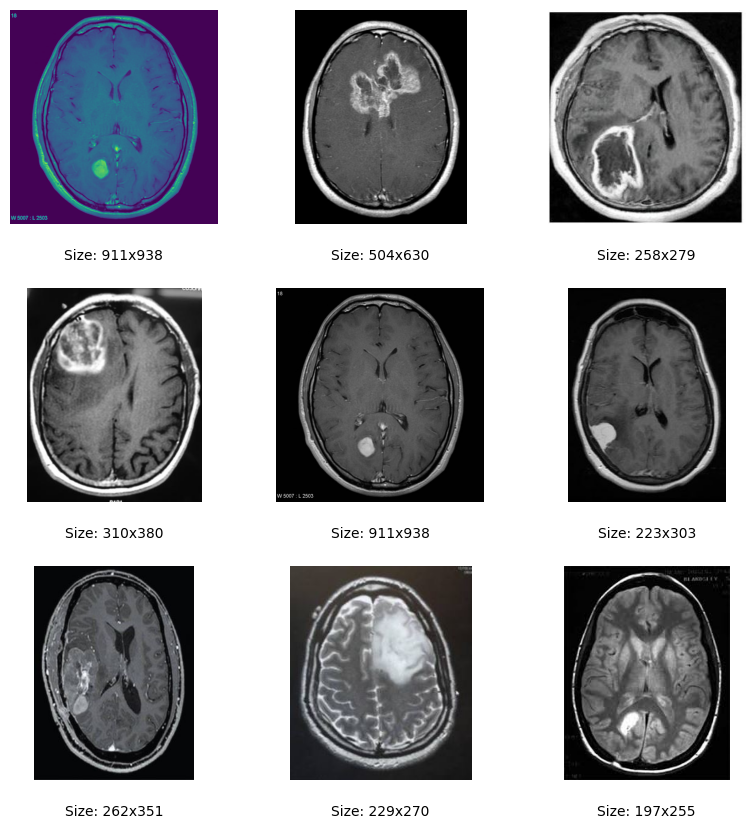

In [37]:
show_images(yes_dr)

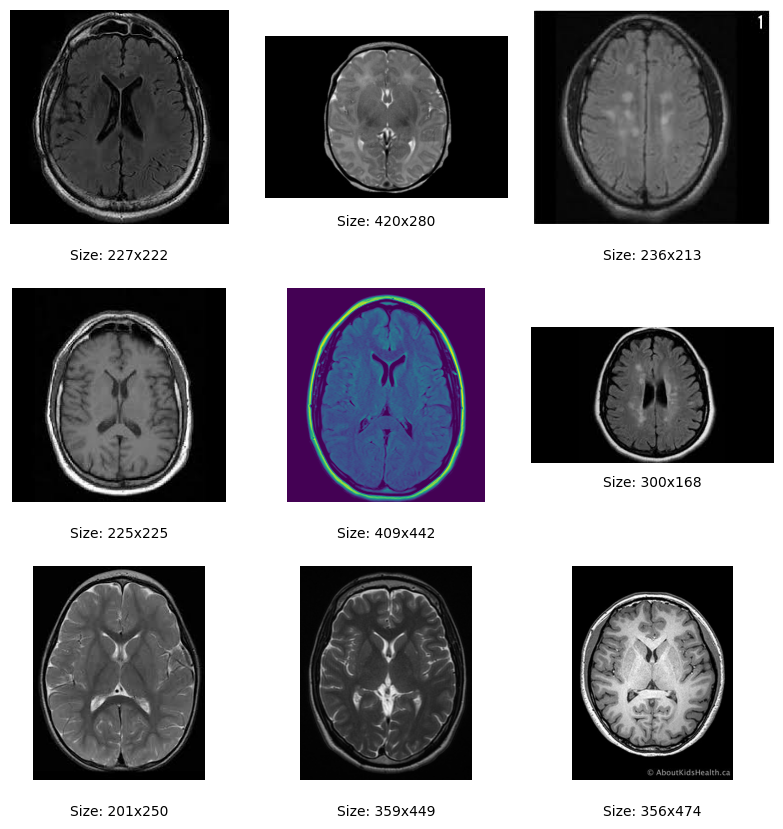

In [38]:
show_images(no_dr)

In [31]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
   l=os.listdir(SOURCE)
   l=random.sample(l ,len(l))
   s=0
   images_training=int(SPLIT_SIZE*len(l))
   for img in l:
      image_path=os.path.join(SOURCE,img)
      s=s+1
      if s<=images_training:
        copyfile( os.path.join( SOURCE,img) , os.path.join(TRAINING,img))
      else :
        copyfile( os.path.join( SOURCE,img), os.path.join(TESTING,img))

In [33]:


TRAINING_DIR = "/content/data/training"
TESTING_DIR = "/content/data/testing"

TRAINING_yes_dr= os.path.join(TRAINING_DIR, "yes")
TESTING_yes_dr = os.path.join(TESTING_DIR, "yes")

TRAINING_no_dr = os.path.join(TRAINING_DIR, "no")
TESTING_no_dr = os.path.join(TESTING_DIR, "no")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_yes_dr)) > 0:
  for file in os.scandir(TRAINING_yes_dr):
    os.remove(file.path)
if len(os.listdir(TRAINING_no_dr)) > 0:
  for file in os.scandir(TRAINING_no_dr):
    os.remove(file.path)
if len(os.listdir(TESTING_no_dr)) > 0:
  for file in os.scandir(TESTING_no_dr):
    os.remove(file.path)
if len(os.listdir(TESTING_yes_dr)) > 0:
  for file in os.scandir(TESTING_yes_dr):
    os.remove(file.path)
split_size = 0.85

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(yes_dr, TRAINING_yes_dr, TESTING_yes_dr, split_size)
split_data(no_dr, TRAINING_no_dr, TESTING_no_dr, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_yes_dr))} images of TRAINING_yes_dr")
print(f"There are {len(os.listdir(TRAINING_no_dr))} images of TRAINING_no_dr")
print(f"There are {len(os.listdir(TESTING_no_dr))} images of TESTING_no_dr")
print(f"There are {len(os.listdir(TESTING_yes_dr))} images of TESTING_yes_dr")



There are 131 images of TRAINING_yes_dr
There are 83 images of TRAINING_no_dr
There are 15 images of TESTING_no_dr
There are 24 images of TESTING_yes_dr


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
TRAINING_DIR = "/content/data/training"
TESTING_DIR = "/content/data/testing"


In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR,shape):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=30,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=shape,
                                                      color_mode='grayscale' )

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                target_size=shape,
                                                                color_mode='grayscale')
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR,(150,150))

Found 3421 images belonging to 2 classes.
Found 605 images belonging to 2 classes.


In [ ]:
def image_dataset_from_directory(TRAINING_DIR, VALIDATION_DIR,shape):

  rescale_factor=tf.keras.layers.Rescaling(1./255)
  train_datst = tf.keras.utils.image_dataset_from_directory(directory=TRAINING_DIR,
    label_mode='binary',

    color_mode='rgb',
    batch_size=32,
    image_size=shape,
    shuffle=True,
    seed=42)
  val_dats = tf.keras.utils.image_dataset_from_directory(directory=VALIDATION_DIR,
    label_mode='binary',

    color_mode='rgb',
    batch_size=32,
    image_size=shape,
    shuffle=True,
    seed=42)
  train_datst = train_datst.map(lambda x, y: (rescale_factor(x), y))
  val_dats = val_dats.map(lambda x, y: (rescale_factor(x), y))
  return train_datst, val_dats

In [ ]:
train_dataset,validation_dataset=image_dataset_from_directory(TRAINING_DIR, TESTING_DIR,(150,150))

In [ ]:
import tensorflow as tf

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras


In [ ]:
batch_size = 32
epochs = 100
# dimensions des images
img_rows, img_cols = 150, 150
input_shape = (img_rows, img_cols, 3)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ModelCheckpoint to save model in case of interrupting the learning process
checkpoint = ModelCheckpoint("./model_hole_in_the_street.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=5,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150*150 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,1)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    # 1024 neuron hidden layer
    keras.layers.Dense(1024, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 256)      

In [ ]:
history=model.fit(train_generator,
          batch_size=32,
          epochs=50,
          verbose=1,
          callbacks=callbacks,
          validation_data=validation_generator)

Epoch 1/50
107/107 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.5960
Epoch 1: val_loss improved from inf to 0.60166, saving model to ./model_hole_in_the_street.h5
107/107 [==============================] - 36s 299ms/step - loss: 0.6822 - accuracy: 0.5960 - val_loss: 0.6017 - val_accuracy: 0.6165
Epoch 2/50
107/107 [==============================] - ETA: 0s - loss: 0.6316 - accuracy: 0.6378
Epoch 2: val_loss did not improve from 0.60166
107/107 [==============================] - 23s 219ms/step - loss: 0.6316 - accuracy: 0.6378 - val_loss: 0.6296 - val_accuracy: 0.6050
Epoch 3/50
107/107 [==============================] - ETA: 0s - loss: 0.6160 - accuracy: 0.6609
Epoch 3: val_loss improved from 0.60166 to 0.60079, saving model to ./model_hole_in_the_street.h5
107/107 [==============================] - 30s 281ms/step - loss: 0.6160 - accuracy: 0.6609 - val_loss: 0.6008 - val_accuracy: 0.6711
Epoch 4/50
107/107 [==============================] - ETA: 0s - loss: 0

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 256)      

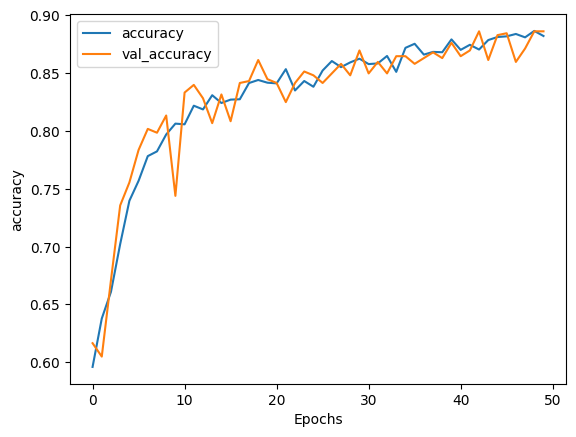

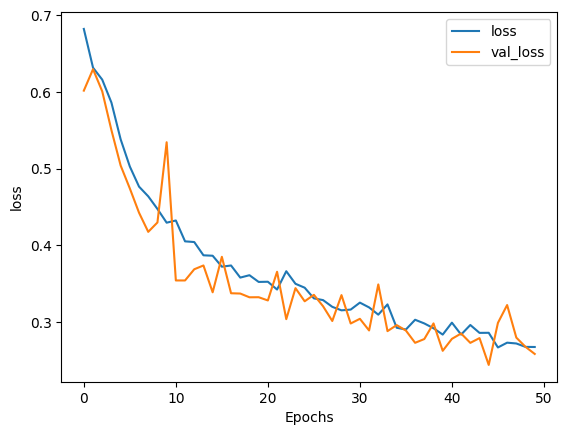

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  index = model.predict(images, batch_size=10)
  print(index)